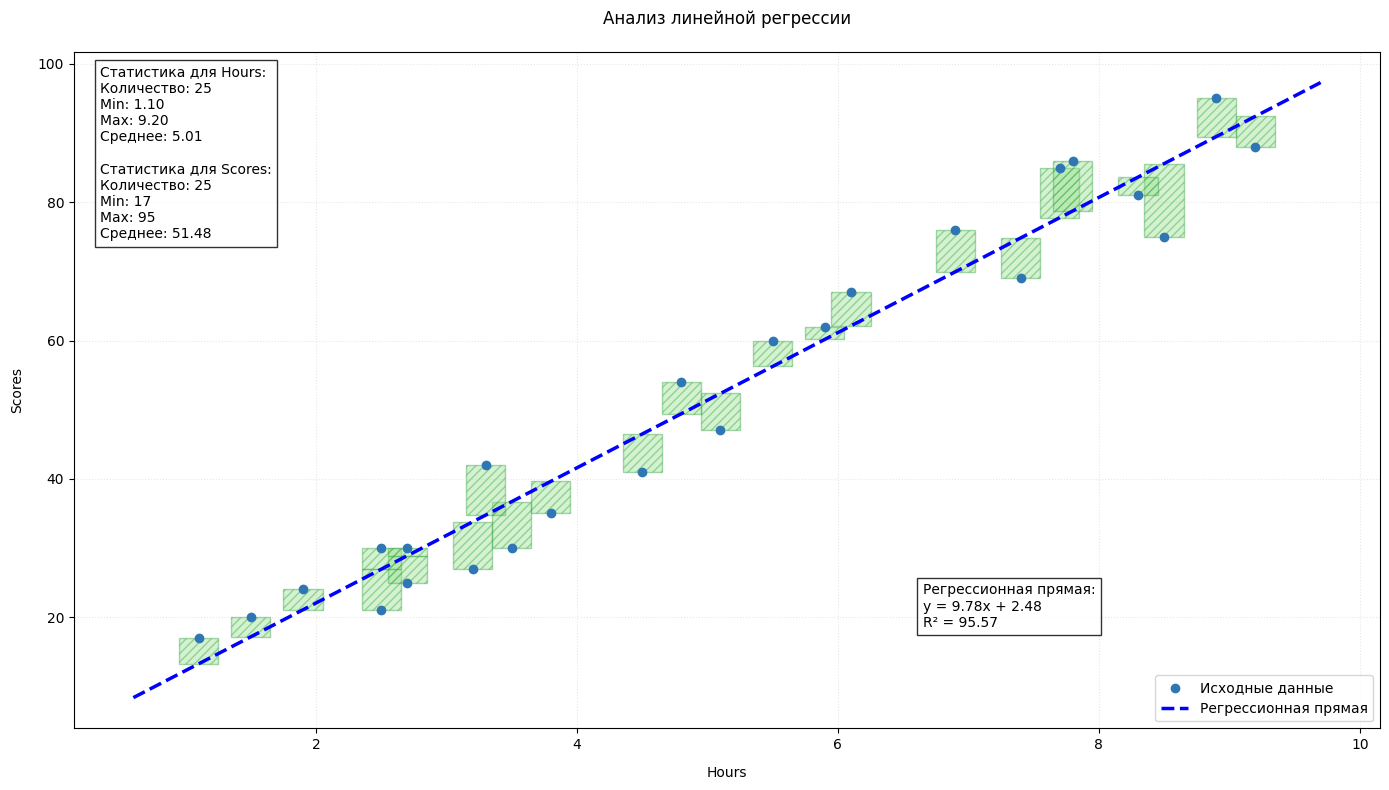

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

file_path = "student_scores.csv"
x_col = "Hours"
y_col = "Scores"
regression_color = "#0000FF"

df = pd.read_csv(file_path)

# Выбор X и Y столбца
x = df[x_col].values
y = df[y_col].values

# Вычисление статистики
stats_text = (
    f"Статистика для {x_col}:\n"
    f"Количество: {len(x)}\n"
    f"Min: {x.min():.2f}\nMax: {x.max():.2f}\nСреднее: {x.mean():.2f}\n\n"
    f"Статистика для {y_col}:\n"
    f"Количество: {len(y)}\n"
    f"Min: {y.min()}\nMax: {y.max()}\nСреднее: {y.mean():.2f}"
)

# Вычисление параметров регрессии
n = len(x)
sum_x, sum_y = np.sum(x), np.sum(y)
slope = (n*np.sum(x*y) - sum_x*sum_y) / (n*np.sum(x**2) - sum_x**2)
intercept = (sum_y - slope*sum_x) / n
equation_text = f"Регрессионная прямая:\ny = {slope:.2f}x + {intercept:.2f}\nR² = {slope**2:.2f}"

# Создание графиков
plt.figure(figsize=(14, 8))
ax = plt.gca()

ax.scatter(x, y, color='#2f77b4', label='Исходные данные', zorder=3)

# Регрессионная прямая
x_vals = np.array([x.min()-0.5, x.max()+0.5])
y_vals = slope*x_vals + intercept
ax.plot(x_vals, y_vals, 
        color=regression_color, 
        linewidth=2.5, 
        linestyle="--",
        label='Регрессионная прямая',
        zorder=2)

# Квадраты ошибок
for xi, yi in zip(x, y):
    y_pred = slope*xi + intercept
    error = yi - y_pred
    if error != 0:
        rect = Rectangle((xi-0.15, y_pred), 
                         0.3, error,
                         edgecolor='#2ca03c',
                         facecolor='#94df8a',
                         alpha=0.4,
                         hatch="////")
        ax.add_patch(rect)

ax.text(0.02, 0.98, stats_text,
        transform=ax.transAxes,
        verticalalignment='top',
        bbox=dict(facecolor='white', alpha=0.8))

ax.text(0.65, 0.15, equation_text,
        transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.8))

plt.title("Анализ линейной регрессии", pad=20)
plt.xlabel(x_col, labelpad=10)
plt.ylabel(y_col, labelpad=10)
plt.grid(True, alpha=0.3, linestyle=":")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()